Membres de l'équipe:
- Abdessamed Seddiki
- Hind Ledra
- Inas Bouaiss
- Lydia Mouhoun
- Mohammed Arab
- Serine Gheddou

Groupe:
  2CS SIQ2


Présentation de la solution:

Description générale du code : Ce code implémente l'algorithme Branch and Bound pour résoudre le problème du Bin Packing. Il génère des configurations de bacs potentielles pour placer les objets, évalue chaque configuration en fonction du nombre de bacs utilisés et de la capacité restante dans le dernier bac, et utilise une stratégie de séparation et d'évaluation pour explorer efficacement l'espace des solutions possibles. L'élagage est également appliqué pour éliminer les branches non prometteuses de l'arbre de recherche, ce qui réduit l'espace de recherche et améliore les performances de l'algorithme.

Critère de séparation et d'évaluation : Le critère de séparation et d'évaluation utilisé dans le code est basé sur le nombre de bacs utilisés et la capacité restante dans le dernier bac. Les configurations de bacs sont générées en ajoutant les objets un par un, en vérifiant à chaque étape si l'ajout d'un objet respecte la capacité des bacs. L'évaluation d'une configuration est ensuite effectuée en calculant le nombre de bacs utilisés et en prenant en compte la capacité restante dans le dernier bac. Les nœuds non prometteurs sont élagués, ce qui contribue à réduirel'espace de recherche et à accélérer la recherche de la solution optimale.


Le code inclut une fonction pour lire les données du problème à partir d'un fichier de benchmark, ce qui permet de tester l'algorithme avec différentes instances du problème.

Le temps d'exécution de l'algorithme est mesuré et affiché, fournissant ainsi des informations sur la performance de l'algorithme pour résoudre des instances spécifiques du problème.


In [ ]:
import random
import math
import time

class Noeud:
    """
    Représente un nœud dans l'arbre de recherche.
    """
    def __init__(self, niveau: int, bacs: list[list[int]]):
        """
        Initialise un nœud avec son niveau dans l'arbre et les bacs actuellement remplis.
        """
        self.niveau = niveau  # Profondeur dans l'arbre
        self.bacs = bacs  # Configuration des objets (liste de bacs : chaque bac est une liste d'objets)
        self.enfants = []  # Liste des nœuds enfants

    def __str__(self):
        """
        Renvoie une représentation sous forme de chaîne de caractères du contenu des bacs.
        """
        return f"{self.bacs}"


def generer_enfants(liste_objets: list[int], capacite_bacs: int, noeud: Noeud):
    """
    Génère les nœuds enfants pour un nœud donné en ajoutant les objets restants dans les bacs.
    """
    i = noeud.niveau  # Récupère le niveau actuel de l'arbre
    objet = liste_objets[i]  # Récupère l'objet actuel à ajouter dans les bacs

    # Crée un nouveau nœud avec l'objet ajouté dans un nouveau bac
    nouveau_noeud = Noeud(i + 1, noeud.bacs + [[objet]])
    noeud.enfants.append(nouveau_noeud)

    # Parcours chaque bac du nœud
    for j, bac in enumerate(noeud.bacs):
        # Vérifie si l'objet peut être ajouté au bac actuel sans dépasser la capacité
        if sum(bac) + objet <= capacite_bacs:
            # Crée un nouveau nœud avec l'objet ajouté dans le bac actuel
            nouveau_noeud = Noeud(i + 1, noeud.bacs.copy())
            nouveau_noeud.bacs[j] = bac + [objet]
            noeud.enfants.append(nouveau_noeud)

    return noeud.enfants


def evaluer(noeud: Noeud):
    """
    Évalue un nœud en fonction du nombre de bacs utilisés.
    """
    if noeud.niveau < n - 1:  # Si le nœud n'est pas une feuille
        # Calcule une estimation du nombre de bacs nécessaires en fonction des objets restants
        return len(noeud.bacs) + math.ceil((sum(items[noeud.niveau + 1:])) / capacite_bacs)
    return len(noeud.bacs)  # Si c'est une feuille, renvoie le nombre de bacs utilisés


def branch_and_bound(liste_objets: list[int], capacite_bacs: int):
    """
    Implémente l'algorithme "branch and bound" pour résoudre le problème du bin packing.
    """
    debut = time.time()  # Début du chronomètre
    racine = Noeud(0, [])  # Crée le nœud racine
    noeuds_actifs = generer_enfants(liste_objets, capacite_bacs, racine)  # Génère les nœuds enfants
    borne_superieure = len(liste_objets) + 1  # Borne supérieure du nombre de bacs (+ infini)
    meilleure_solution = None

    # Parcours en profondeur de l'arbre de recherche
    while noeuds_actifs:
        noeud = noeuds_actifs.pop()

        if noeud.niveau < len(liste_objets) - 1:  # Si ce n'est pas une feuille
            if evaluer(noeud) <= borne_superieure:  # Si le nœud a du potentiel, ne pas le tailler
                noeuds_actifs.extend(generer_enfants(liste_objets, capacite_bacs, noeud))
        else:  # Si c'est une feuille
            evaluation = evaluer(noeud)  # Calcule le coût de ce nœud
            if evaluation <= borne_superieure:  # Si c'est une solution meilleure
                borne_superieure = evaluation
                meilleure_solution = noeud

    fin = time.time()  # Fin du chronomètre
    temps_execution = fin - debut  # Calcul du temps d'exécution

    return meilleure_solution, temps_execution


# Lecture du fichier BPP
def lire_fichier_bpp(chemin_fichier):
    """
    Lit un fichier de benchmark pour le problème du bin packing.
    """
    with open(chemin_fichier, 'r') as f:
        n = int(f.readline().strip())  # Nombre d'objets
        capacite_bac = int(f.readline().strip())  # Capacité des bacs
        objets = [int(ligne.strip()) for ligne in f]  # Tailles des objets
    return (n, capacite_bac, objets)


# Résolution du problème du bin packing
#(n, capacite_bacs, items) = lire_fichier_bpp('BPP_100_100.txt')  # ceci un exemple
(n, capacite_bacs, items) = lire_fichier_bpp('/content/drive/MyDrive/[OPTIM] TPs/TP6-OurProject/complex_benchmarks/benchmark_Falkenauer_t60.txt')
resultat, temps_execution = branch_and_bound(items, capacite_bacs)

# Affichage de la solution et du temps d'exécution
print(f"Nombre minimal de bins : {len(resultat.bacs)} \nSolution : {resultat}")
print(f"Temps d'exécution : {temps_execution} secondes")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


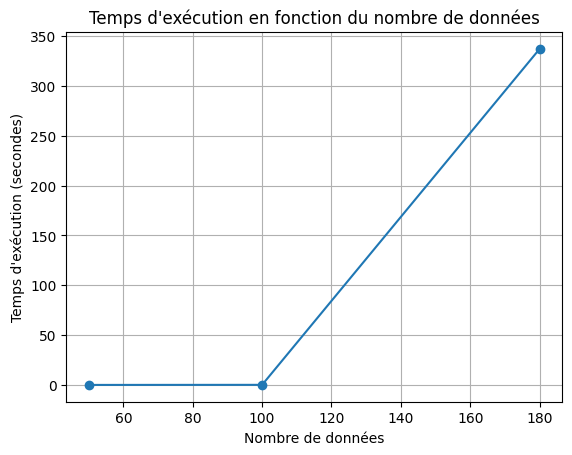

In [ ]:
import matplotlib.pyplot as plt

# Tableau de données (nombre de données, temps d'exécution)
donnees = [
    (50,  0.00104),
    (100, 0.0832),
    (180, 337.2),
    # Ajoutez vos données supplémentaires ici
]

# Extraction des valeurs individuelles
nombre_donnees = [data[0] for data in donnees]
temps_execution = [data[1] for data in donnees]

# Tracer le graphe
plt.plot(nombre_donnees, temps_execution, marker='o', linestyle='-')

# Ajouter des étiquettes et des titres
plt.title('Temps d\'exécution en fonction du nombre de données')
plt.xlabel('Nombre de données')
plt.ylabel('Temps d\'exécution (secondes)')

# Afficher le graphe
plt.grid(True)
plt.show()

Discussion des résultats:

Le graphe montre que le temps d'exécution de l'algorithme de branch and bound pour le problème du bin packing augmente de manière non linéaire avec la taille du problème, il est très faible pour de petites instances, mais à partir d'un certain seuil, il devient exponentiel. D'après les tests, le seuil à partir duquel le temps explose à partir de 184 bins.




